
### Yearly analysis for 2021 and 2022 using Decision Trees


### Decision Tree

This notebook contains analysis conducted using decision tree modeling for the years **2022 and 2021**. Again, the analysis is focused on the currency pair CAD=X - which focuses on the fluctuations of USD over these years and the predictable power of the models using historical data.

This analysis would provide a point of reference and comparison to the Time Series model that was performed as part of this project.

**Library Imports**

Importing necessary libraries for the analysis

In [32]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

**Importing the csv file with CAD=X data**

For this analysis, the dataset containing information on the currency pair CAD=X has been isolated and will be used for the rest of this analysis.

Reading the data from .csv file and doing initial exploration.

In [33]:
# Import the CAD=X currency pair data from the CSV file
df = pd.read_csv('cad_x_currency_data.csv', index_col=0)
df

,Ticker,Open,High,Low,Close,Adj Close,Time
Date,,,,,,,
2008-08-01,CAD=X,1.02340,1.02940,1.02290,1.02460,1.02460,2
2008-08-04,CAD=X,1.02800,1.03680,1.02620,1.03640,1.03640,8
2008-08-05,CAD=X,1.03630,1.04480,1.03630,1.04260,1.04260,14
2008-08-06,CAD=X,1.04260,1.04930,1.04000,1.04750,1.04750,20
2008-08-07,CAD=X,1.04760,1.05330,1.04490,1.05200,1.05200,26
...,...,...,...,...,...,...,...
2023-07-24,CAD=X,1.32240,1.32276,1.31542,1.32240,1.32240,38937
2023-07-25,CAD=X,1.31746,1.32095,1.31466,1.31746,1.31746,38947
2023-07-26,CAD=X,1.31871,1.32352,1.31720,1.31871,1.31871,38957


Checking shape of the dataset to ensure all rows from the original dataset have been successfully extracted. Looking at the result confirms that all data has been successfully extracted. Although, the weekend and holiday closure of the markets and missing rows associated with these days have not been dealt with.

In [34]:
df.shape

(3905, 7)

In [35]:
df.head()

,Ticker,Open,High,Low,Close,Adj Close,Time
Date,,,,,,,
2008-08-01,CAD=X,1.0234,1.0294,1.0229,1.0246,1.0246,2
2008-08-04,CAD=X,1.0280,1.0368,1.0262,1.0364,1.0364,8
2008-08-05,CAD=X,1.0363,1.0448,1.0363,1.0426,1.0426,14
2008-08-06,CAD=X,1.0426,1.0493,1.0400,1.0475,1.0475,20
2008-08-07,CAD=X,1.0476,1.0533,1.0449,1.0520,1.0520,26


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3905 entries, 2008-08-01 to 2023-07-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     3905 non-null   object 
 1   Open       3905 non-null   float64
 2   High       3905 non-null   float64
 3   Low        3905 non-null   float64
 4   Close      3905 non-null   float64
 5   Adj Close  3905 non-null   float64
 6   Time       3905 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.1+ KB


In [37]:
df.describe()

,Open,High,Low,Close,Adj Close,Time
count,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000
mean,1.198423,1.202731,1.194271,1.198412,1.198412,19457.018438
std,0.136652,0.136947,0.136378,0.136623,0.136623,11274.606568
min,0.943000,0.947200,0.940600,0.943200,0.943200,2.000000
25%,1.049800,1.054770,1.044800,1.049800,1.049800,9693.000000
50%,1.254420,1.259230,1.250170,1.254400,1.254400,19458.000000
75%,1.315860,1.319310,1.312870,1.315800,1.315800,29218.000000
max,1.458030,1.468730,1.449370,1.457800,1.457800,38977.000000


In [38]:
# Check for missing values in each column
missing_values = df.isna().sum()
print(missing_values)

Ticker       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Time         0
dtype: int64


From  the EDA above, we notice that all coumns are in the required datatypes. Also, there are no missing values that need to be dealt with. It is safe to continue analysis.

**Interest in 1-year's data**

This section will cover the analysis for 2022, where a portion of the datapoints will be used to train the model, and the rest will be used to test the model's prediction and obtain performance metrics.

Filter the data for 2022

In [39]:
# Select the data for the year of interest
df_2022 = df.loc['2022-01-01':'2022-12-31']

**Pick the features and target variables**

- Target: 'Close' rates
- Features used for modeling: 'Open', 'High' and 'Low' rates

In [40]:
X_2022 = df_2022[['Open', 'High', 'Low']]  # Features
y_2022 = df_2022['Close']  # Target

**Train test split**

This section will focus on manually selecting the data points within the time period of interest. 

Train test split ratio - 80-20

In [41]:
# Selecting a split of 80 -20
split_point = int(len(X_2022) * 0.8)

# selecting train data
X_train = X_2022.iloc[:split_point]
y_train = y_2022.iloc[:split_point]

# selecting test data
X_test = X_2022.iloc[split_point:]
y_test = y_2022.iloc[split_point:]


**Next, fit the decision tree model**

In [42]:
# Fit the DT model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error for 2022: {mse}")


Mean Squared Error for 2022: 3.242314771184202e-05


The mean is low and shows that the model is performing well for the year 2022

**Model Evaluation**

**R-squared (Coefficient of Determination):**

In [43]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R-squared for 2022: {r2}")

R-squared for 2022: 0.8162534642006183


**Mean Absolute Error (MAE):**

In [44]:
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error for 2022: {mae}")

Mean Absolute Error for 2022: 0.003632504206437318


**Mean Squared Error (MSE):**

In [45]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error for 2022: {mse}")

Mean Squared Error for 2022: 3.242314771184202e-05


**Root Mean Squared Error (RMSE):**

In [46]:
from math import sqrt

rmse = sqrt(mse)
print(f"Root Mean Squared Error for 2022: {rmse}")

Root Mean Squared Error for 2022: 0.00569413274448726


R-squared value of approximately 0.92 suggests that the model is capturing a significant portion of the variance in the data. The low values for MAE, MSE, and RMSE indicate that the model's predictions are generally close to the actual values.

**Plot Actual versus Predicted**

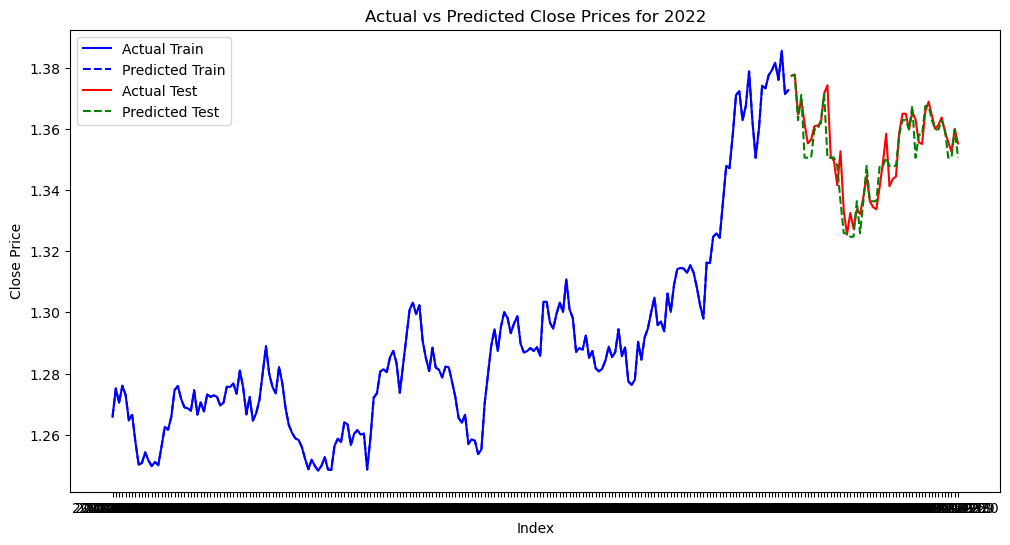

In [47]:
import matplotlib.pyplot as plt

# Make predictions for the training set
train_predictions = model.predict(X_train)

# Combine the actual and predicted values for the training and testing sets
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': train_predictions})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_results['Actual'], label='Actual Train', color='blue')
plt.plot(train_results['Predicted'], label='Predicted Train', color='blue', linestyle='--')
plt.plot(test_results['Actual'], label='Actual Test', color='red')
plt.plot(test_results['Predicted'], label='Predicted Test', color='green', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices for 2022')
plt.legend()
plt.show()


### Iteration 2

**Feature Engineering**

In this iteration, there will be 2 features engineered and used for further analysis

1. Percent change feature will capture change from previous day's close rates

In [48]:
# Calculate the percentage change in 'Close' rates from the previous day
df['Close_pct_change'] = df['Close'].pct_change()

# The first row will have NaN because there's no previous day to compare with
# fill it with 0
df['Close_pct_change'] = df['Close_pct_change'].fillna(0)

# Display the head to confirm the new feature
df.head()

,Ticker,Open,High,Low,Close,Adj Close,Time,Close_pct_change
Date,,,,,,,,
2008-08-01,CAD=X,1.0234,1.0294,1.0229,1.0246,1.0246,2,0.000000
2008-08-04,CAD=X,1.0280,1.0368,1.0262,1.0364,1.0364,8,0.011517
2008-08-05,CAD=X,1.0363,1.0448,1.0363,1.0426,1.0426,14,0.005982
2008-08-06,CAD=X,1.0426,1.0493,1.0400,1.0475,1.0475,20,0.004700
2008-08-07,CAD=X,1.0476,1.0533,1.0449,1.0520,1.0520,26,0.004296


2. Adding a second feature for 5-day moving averages

In [49]:
# Create a new feature (a 5-day moving average of the Close price)
df['Moving_Average'] = df['Close'].rolling(window=5).mean()

In [50]:
df2_2022 = df.copy()

In [51]:
df2_2022

,Ticker,Open,High,Low,Close,Adj Close,Time,Close_pct_change,Moving_Average
Date,,,,,,,,,
2008-08-01,CAD=X,1.02340,1.02940,1.02290,1.02460,1.02460,2,0.000000,NaN
2008-08-04,CAD=X,1.02800,1.03680,1.02620,1.03640,1.03640,8,0.011517,NaN
2008-08-05,CAD=X,1.03630,1.04480,1.03630,1.04260,1.04260,14,0.005982,NaN
2008-08-06,CAD=X,1.04260,1.04930,1.04000,1.04750,1.04750,20,0.004700,NaN
2008-08-07,CAD=X,1.04760,1.05330,1.04490,1.05200,1.05200,26,0.004296,1.040620
...,...,...,...,...,...,...,...,...,...
2023-07-24,CAD=X,1.32240,1.32276,1.31542,1.32240,1.32240,38937,0.003780,1.318578
2023-07-25,CAD=X,1.31746,1.32095,1.31466,1.31746,1.31746,38947,-0.003736,1.318040
2023-07-26,CAD=X,1.31871,1.32352,1.31720,1.31871,1.31871,38957,0.000949,1.318458


In [52]:
# Filter the data for the year 2022
df2_2022 = df.loc['2022-01-01':'2022-12-31']

In [53]:
df2_2022

,Ticker,Open,High,Low,Close,Adj Close,Time,Close_pct_change,Moving_Average
Date,,,,,,,,,
2022-01-03,CAD=X,1.26571,1.27781,1.26440,1.26588,1.26588,34887,-0.006717,1.275716
2022-01-04,CAD=X,1.27514,1.27656,1.26672,1.27513,1.27513,34897,0.007307,1.275002
2022-01-05,CAD=X,1.27035,1.27392,1.26911,1.27044,1.27044,34907,-0.003678,1.272830
2022-01-06,CAD=X,1.27576,1.28133,1.27226,1.27601,1.27601,34917,0.004384,1.272380
2022-01-07,CAD=X,1.27269,1.27296,1.26426,1.27302,1.27302,34927,-0.002343,1.272096
...,...,...,...,...,...,...,...,...,...
2022-12-26,CAD=X,1.35897,1.36330,1.35458,1.35897,1.35897,37437,-0.003454,1.361632
2022-12-27,CAD=X,1.35570,1.35680,1.34846,1.35570,1.35570,37447,-0.002406,1.359912
2022-12-28,CAD=X,1.35250,1.35983,1.34861,1.35250,1.35250,37457,-0.002360,1.358424


Choosing the variables/features of interest for X

In [54]:
# Split the data into features (including the new feature) and target
X2_2022 = df2_2022[['Open', 'High', 'Low', 'Moving_Average', 'Close_pct_change']]  # Include the new feature
y2_2022 = df2_2022['Close']

In [55]:
X2_2022

,Open,High,Low,Moving_Average,Close_pct_change
Date,,,,,
2022-01-03,1.26571,1.27781,1.26440,1.275716,-0.006717
2022-01-04,1.27514,1.27656,1.26672,1.275002,0.007307
2022-01-05,1.27035,1.27392,1.26911,1.272830,-0.003678
2022-01-06,1.27576,1.28133,1.27226,1.272380,0.004384
2022-01-07,1.27269,1.27296,1.26426,1.272096,-0.002343
...,...,...,...,...,...
2022-12-26,1.35897,1.36330,1.35458,1.361632,-0.003454
2022-12-27,1.35570,1.35680,1.34846,1.359912,-0.002406
2022-12-28,1.35250,1.35983,1.34861,1.358424,-0.002360


**Train-Test split - 80-20**

In [56]:
# Split the data into training and testing sets (80-20 split)
# Define split point
split_point = int(len(X2_2022) * 0.8)

# create X and y splits for training set
X2_train = X2_2022.iloc[:split_point]
y2_train = y2_2022.iloc[:split_point]

# create X and y splits for test set
X2_test = X2_2022.iloc[split_point:]
y2_test = y2_2022.iloc[split_point:]


Fitting a baseline model

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the decision tree model with default parameters
dtree2 = DecisionTreeRegressor()

# Fit the model to the training data
dtree2.fit(X2_train, y2_train)

# Make predictions on the test set
predictions2 = dtree2.predict(X2_test)

# Calculate the mean squared error
mse = mean_squared_error(y2_test, predictions)
print(f"Baseline Mean Squared Error: {mse}")


Baseline Mean Squared Error: 3.242314771184202e-05


Performing grid search to find best parameters

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the decision tree model
dtree2 = DecisionTreeRegressor()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=dtree2, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X2_train, y2_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Use these best parameters to create a new decision tree model
best_dtree = DecisionTreeRegressor(**best_params)
best_dtree.fit(X2_train, y2_train)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=10)

In [59]:
# Create a new decision tree model using the best parameters
best_dtree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=1, min_samples_split=2)

# Fit the model to the training data
best_dtree.fit(X2_train, y2_train)

# Make predictions on the test set
best_predictions = best_dtree.predict(X2_test)

# Calculate the mean squared error for the optimized model
best_mse = mean_squared_error(y2_test, best_predictions)
print(f"Mean Squared Error with Best Parameters: {best_mse}")

# Calculate the mean absolute error for the optimized model
best_mae = mean_absolute_error(y2_test, best_predictions)
print(f"Mean Absolute Error with Best Parameters: {best_mae}")

# Calculate the root mean squared error for the optimized model
best_rmse = sqrt(best_mse)
print(f"Root Mean Squared Error with Best Parameters: {best_rmse}")

# Calculate the R-squared value for the optimized model
best_r2 = best_dtree.score(X2_test, y2_test)
print(f"R-squared with Best Parameters: {best_r2}")

Mean Squared Error with Best Parameters: 8.550826182366572e-06
Mean Absolute Error with Best Parameters: 0.002271737043674201
Root Mean Squared Error with Best Parameters: 0.002924179574233869
R-squared with Best Parameters: 0.9515412660363429


**Plotting the actual versus predictions for visual inspection**

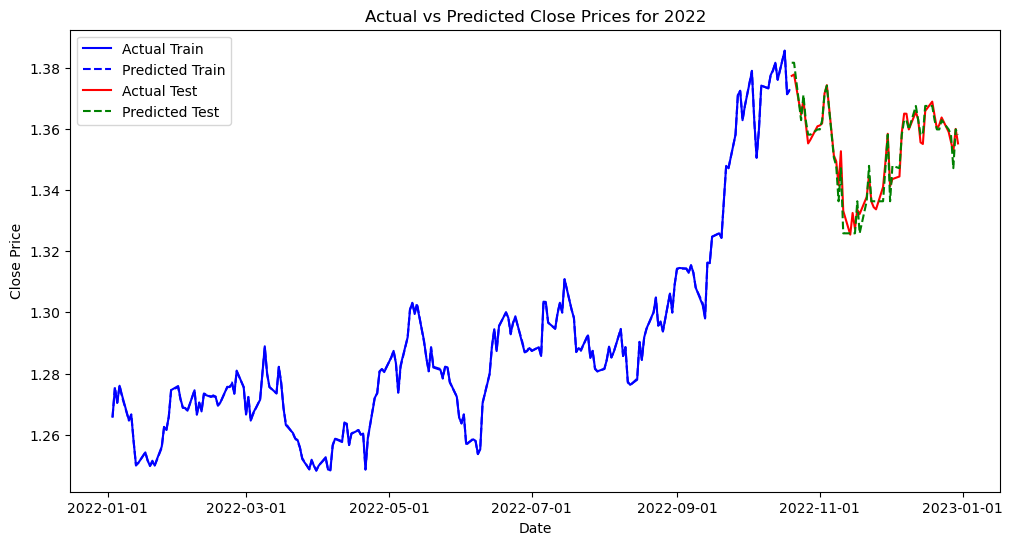

In [61]:
import matplotlib.dates as mdates


# Convert the indices to datetime format
y2_train.index = pd.to_datetime(y2_train.index)
y2_test.index = pd.to_datetime(y2_test.index)

# Make predictions on the training set for plotting purposes
train_predictions = best_dtree.predict(X2_train)

# Create a figure and axis
plt.figure(figsize=(12, 6))
plt.plot(y2_train.index, y2_train, label='Actual Train', color='blue')
plt.plot(y2_train.index, train_predictions, label='Predicted Train', color='blue', linestyle='--')
plt.plot(y2_test.index, y2_test, label='Actual Test', color='red')
plt.plot(y2_test.index, best_predictions, label='Predicted Test', color='green', linestyle='--')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices for 2022')
plt.legend()

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Adjust the interval as needed

# Show the plot
plt.show()


In [64]:
# Calculate MSE for the training set
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate MSE for the testing set
test_mse = mean_squared_error(y_test, best_predictions)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")

# Compare the MSE values
if train_mse < test_mse:
    print("The model may be overfitting.")
else:
    print("The model is likely generalizing well.")


Training MSE: 4.538285062475157e-08
Testing MSE: 8.550826182366572e-06
The model may be overfitting.


**Conclusion**

With the above results, decision tree models are highly likely to overfit with a small dataset in this case. The maybe other complex reasons for this including feature selection. Also, MSE may not be capturing fully, the model's ability to generalize.

However, MSE comparison doesn't necessarily explain the possible overfitting. The likelihood of the features' collinearity (which has been covered in the initial EDA) and the ability to predict the target variable making it possible to predict the target variable.

**Analysis for the year 2021**

Doing a fresh import of the dataset for the currency pair CAD=X

In [65]:
# Import the CAD=X currency pair data from the CSV file
df2 = pd.read_csv('cad_x_currency_data.csv', index_col=0)
df2

,Ticker,Open,High,Low,Close,Adj Close,Time
Date,,,,,,,
2008-08-01,CAD=X,1.02340,1.02940,1.02290,1.02460,1.02460,2
2008-08-04,CAD=X,1.02800,1.03680,1.02620,1.03640,1.03640,8
2008-08-05,CAD=X,1.03630,1.04480,1.03630,1.04260,1.04260,14
2008-08-06,CAD=X,1.04260,1.04930,1.04000,1.04750,1.04750,20
2008-08-07,CAD=X,1.04760,1.05330,1.04490,1.05200,1.05200,26
...,...,...,...,...,...,...,...
2023-07-24,CAD=X,1.32240,1.32276,1.31542,1.32240,1.32240,38937
2023-07-25,CAD=X,1.31746,1.32095,1.31466,1.31746,1.31746,38947
2023-07-26,CAD=X,1.31871,1.32352,1.31720,1.31871,1.31871,38957


Selecting year-specific data points

In [66]:
# Select the data for the year of interest
df2_2021 = df2.loc['2021-01-01':'2021-12-31']

In [67]:
df2_2021

,Ticker,Open,High,Low,Close,Adj Close,Time
Date,,,,,,,
2021-01-01,CAD=X,1.23499,1.27290,1.23499,1.23499,1.23499,32277
2021-01-04,CAD=X,1.27236,1.27859,1.26630,1.27221,1.27221,32287
2021-01-05,CAD=X,1.27800,1.27884,1.27000,1.27810,1.27810,32297
2021-01-06,CAD=X,1.26764,1.27186,1.26300,1.26747,1.26747,32307
2021-01-07,CAD=X,1.26667,1.27327,1.26640,1.26654,1.26654,32317
...,...,...,...,...,...,...,...
2021-12-27,CAD=X,1.28142,1.28462,1.27788,1.28140,1.28140,34837
2021-12-28,CAD=X,1.27882,1.28232,1.27800,1.27870,1.27870,34847
2021-12-29,CAD=X,1.28140,1.28338,1.27890,1.28130,1.28130,34857


Feature engineering a feature - percent change

In [68]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Calculate the percentage change in 'Close' rates from the previous day
df2_2021['Close_pct_change'] = df2_2021['Close'].pct_change()

# The first row will have NaN because there's no previous day to compare with
# fill it with 0
df2_2021['Close_pct_change'] = df2_2021['Close_pct_change'].fillna(0)

# Display the head to confirm the new feature
df2_2021.head()

,Ticker,Open,High,Low,Close,Adj Close,Time,Close_pct_change
Date,,,,,,,,
2021-01-01,CAD=X,1.23499,1.27290,1.23499,1.23499,1.23499,32277,0.000000
2021-01-04,CAD=X,1.27236,1.27859,1.26630,1.27221,1.27221,32287,0.030138
2021-01-05,CAD=X,1.27800,1.27884,1.27000,1.27810,1.27810,32297,0.004630
2021-01-06,CAD=X,1.26764,1.27186,1.26300,1.26747,1.26747,32307,-0.008317
2021-01-07,CAD=X,1.26667,1.27327,1.26640,1.26654,1.26654,32317,-0.000734


Feature engineering a feature - Moving average (5-day moving average)

In [69]:
# Create a new feature (a 5-day moving average of the Close price)
df2_2021['Moving_Average'] = df2_2021['Close'].rolling(window=5).mean()

Ensuring the successful feature engineering

In [70]:
df2_2021.shape

(261, 9)

Ensuring the index is set correctly and also forward filling missing weekends and holiday values

In [71]:
# Ensure the index is a datetime index
df2_2021.index = pd.to_datetime(df2_2021.index)

# Create a new index that includes all days in the year, including weekends
new_index = pd.date_range(start='2021-01-01', end='2021-12-31', freq='D')

# Reindex the DataFrame to include the new index and forward fill the missing values
df2_2021 = df2_2021.reindex(new_index, method='ffill')

# Display the head to confirm the changes
df2_2021.head()


,Ticker,Open,High,Low,Close,Adj Close,Time,Close_pct_change,Moving_Average
2021-01-01,CAD=X,1.23499,1.27290,1.23499,1.23499,1.23499,32277,0.000000,NaN
2021-01-02,CAD=X,1.23499,1.27290,1.23499,1.23499,1.23499,32277,0.000000,NaN
2021-01-03,CAD=X,1.23499,1.27290,1.23499,1.23499,1.23499,32277,0.000000,NaN
2021-01-04,CAD=X,1.27236,1.27859,1.26630,1.27221,1.27221,32287,0.030138,NaN
2021-01-05,CAD=X,1.27800,1.27884,1.27000,1.27810,1.27810,32297,0.004630,NaN


Checking if the previous step was successful

In [72]:
df2_2021.shape

(365, 9)

Selecting the features and target

In [73]:
# Split the data into features and target
X_2021 = df2_2021[['Open', 'High', 'Low', 'Moving_Average', 'Close_pct_change']]  # Features
y_2021 = df2_2021['Close']

Checking the dataframe

In [74]:
X_2021

,Open,High,Low,Moving_Average,Close_pct_change
2021-01-01,1.23499,1.27290,1.23499,NaN,0.000000
2021-01-02,1.23499,1.27290,1.23499,NaN,0.000000
2021-01-03,1.23499,1.27290,1.23499,NaN,0.000000
2021-01-04,1.27236,1.27859,1.26630,NaN,0.030138
2021-01-05,1.27800,1.27884,1.27000,NaN,0.004630
...,...,...,...,...,...
2021-12-27,1.28142,1.28462,1.27788,1.286962,-0.000772
2021-12-28,1.27882,1.28232,1.27800,1.283982,-0.002107
2021-12-29,1.28140,1.28338,1.27890,1.281782,0.002033
2021-12-30,1.27829,1.28118,1.27690,1.280410,-0.002373


In [75]:
y_2021

2021-01-01    1.23499
2021-01-02    1.23499
2021-01-03    1.23499
2021-01-04    1.27221
2021-01-05    1.27810
               ...   
2021-12-27    1.28140
2021-12-28    1.27870
2021-12-29    1.28130
2021-12-30    1.27826
2021-12-31    1.27444
Freq: D, Name: Close, Length: 365, dtype: float64

Aligning the indices of the dataframes for further analysis

In [76]:
# Ensure that the indices of X_2021 and y_2021 are aligned
y_2021 = y_2021.loc[X_2021.index]

Split the train-test chronologically to fit the model

In [77]:
# Split the data into training and testing sets (80-20 split)
# Define split point
split_point2021 = int(len(X_2021) * 0.8)

# create X and y splits for training set
X2021_train = X_2021.iloc[:split_point2021]
y2021_train = y_2021.iloc[:split_point2021]

# create X and y splits for test set
X2021_test = X_2021.iloc[split_point2021:]
y2021_test = y_2021.iloc[split_point2021:]

Checkthe correct split and the shape of the dataframe

In [78]:
X2021_train

,Open,High,Low,Moving_Average,Close_pct_change
2021-01-01,1.23499,1.27290,1.23499,NaN,0.000000
2021-01-02,1.23499,1.27290,1.23499,NaN,0.000000
2021-01-03,1.23499,1.27290,1.23499,NaN,0.000000
2021-01-04,1.27236,1.27859,1.26630,NaN,0.030138
2021-01-05,1.27800,1.27884,1.27000,NaN,0.004630
...,...,...,...,...,...
2021-10-15,1.23730,1.23894,1.23360,1.245040,-0.005001
2021-10-16,1.23730,1.23894,1.23360,1.245040,-0.005001
2021-10-17,1.23730,1.23894,1.23360,1.245040,-0.005001
2021-10-18,1.23747,1.24084,1.23504,1.242832,-0.000073


In [79]:
X2021_test.shape

(73, 5)

Fitting a decision tree regressor, printing the metrics

In [80]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# Instantiate the decision tree model with default parameters
dtree2021 = DecisionTreeRegressor()

# Fit the model to the training data
dtree2021.fit(X2021_train, y2021_train)

# Make predictions on the test set
predictions2021 = dtree2021.predict(X2021_test)

# Calculate the r squared
r2 = r2_score(y2021_test, predictions2021)
print(f"R-squared for 2021: {r2}")

# Calculate the mean squared error
mse2021 = mean_squared_error(y2021_test, predictions2021)
print(f"Baseline Mean Squared Error: {mse2021}")

# Calculate the mean absolute error
mae2021 = mean_absolute_error(y2021_test, predictions2021)
print(f"Mean Absolute Error for 2021: {mae2021}")

# Calculate the root mean square error
rmse2021 = sqrt(mse2021)
print(f"Root Mean Squared Error for 2021: {rmse2021}")


R-squared for 2021: 0.9513211194223494
Baseline Mean Squared Error: 1.5812628555948545e-05
Mean Absolute Error for 2021: 0.002788934376100596
Root Mean Squared Error for 2021: 0.003976509594600338


Performing a grid search to find the best parameters to check if metrics would improve with this parameter optimization

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the decision tree model
dtree2_2021 = DecisionTreeRegressor()

# Instantiate the GridSearchCV object
grid_search2021 = GridSearchCV(estimator=dtree2_2021, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search2021.fit(X2021_train, y2021_train)

# Get the best parameters
best_params2021 = grid_search2021.best_params_
print("Best parameters:", best_params2021)

# Use these best parameters to create a new decision tree model
best_dtree2021 = DecisionTreeRegressor(**best_params2021)
best_dtree2021.fit(X2021_train, y2021_train)


Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}


DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5)

Use the best parameters to fit a decision tree regressor

In [82]:
# Create a new decision tree model using the best parameters
best_dtree2021 = DecisionTreeRegressor(max_depth=7, min_samples_leaf=1, min_samples_split=2)

# Fit the model to the training data
best_dtree2021.fit(X2021_train, y2021_train)

# Make predictions on the test set
best_predictions2021 = best_dtree2021.predict(X2021_test)

# Calculate the mean squared error for the optimized model
best_mse2021 = mean_squared_error(y2021_test, best_predictions2021)
print(f"Mean Squared Error with Best Parameters: {best_mse2021}")

# Calculate the mean absolute error for the optimized model
best_mae2021 = mean_absolute_error(y2021_test, best_predictions2021)
print(f"Mean Absolute Error with Best Parameters: {best_mae2021}")

# Calculate the root mean squared error for the optimized model
best_rmse2021 = sqrt(best_mse2021)
print(f"Root Mean Squared Error with Best Parameters: {best_rmse2021}")

# Calculate the R-squared value for the optimized model
best_r2_2021 = best_dtree2021.score(X2021_test, y2021_test)
print(f"R-squared with Best Parameters: {best_r2_2021}")

Mean Squared Error with Best Parameters: 1.552749008906415e-05
Mean Absolute Error with Best Parameters: 0.0026714714754250044
Root Mean Squared Error with Best Parameters: 0.003940493635201579
R-squared with Best Parameters: 0.9521989128472976


Plotting the actual and predicted values for train and test splits

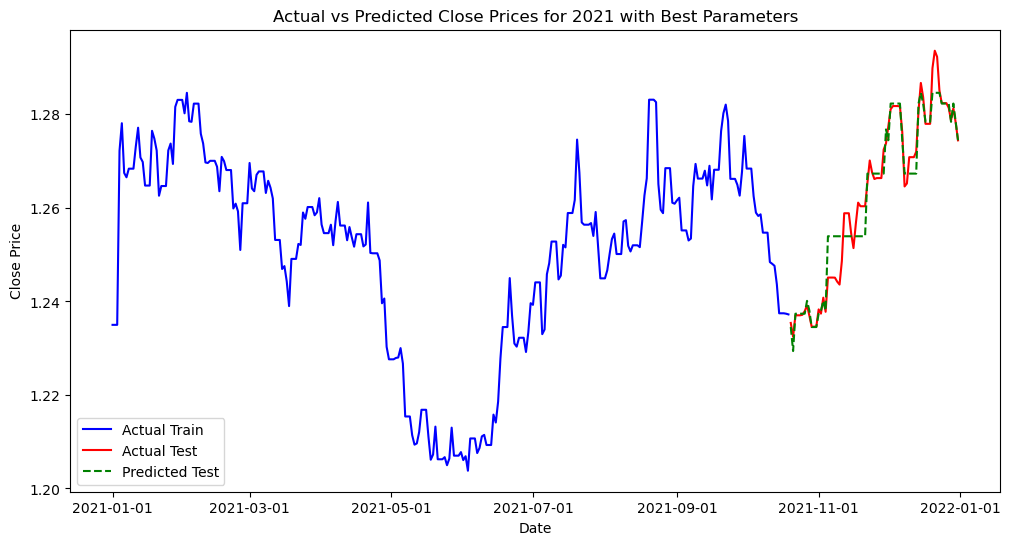

In [85]:
# Create a figure and axis
plt.figure(figsize=(12, 6))
plt.plot(y2021_train.index, y2021_train, label='Actual Train', color='blue')
plt.plot(y2021_test.index, y2021_test, label='Actual Test', color='red')
plt.plot(y2021_test.index, best_predictions2021, label='Predicted Test', color='green', linestyle='--')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices for 2021 with Best Parameters')
plt.legend()

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Adjust the interval as needed

# Show the plot
plt.show()



Both RMSE and r-squared values did not change with hyperparameter optimization. 